In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import early_stopping
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df_train=pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s3e16/test.csv")

In [3]:
df_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


# Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [6]:
df_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [7]:
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [8]:
df_train["Sex"].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [9]:
df_test.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


In [11]:
df_test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

# Data Correlation Heatmap

/tmp/ipykernel_2276/1048663316.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_corr=df_train.corr()


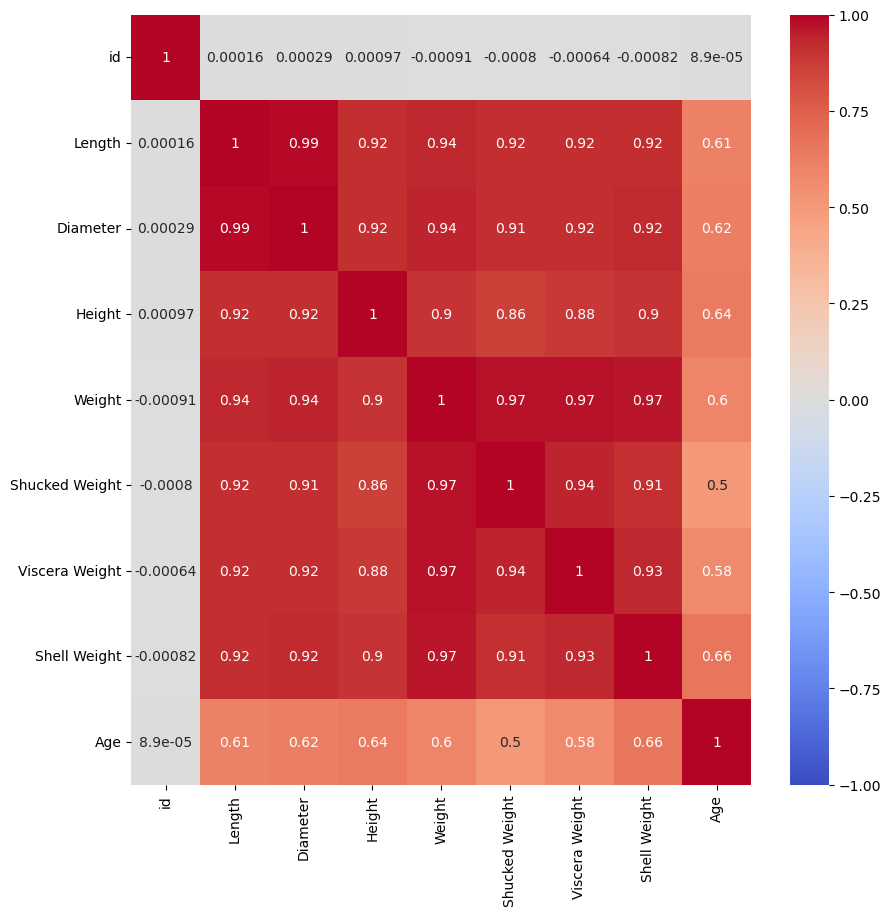

In [12]:
plt.figure(figsize=(10,10))
my_corr=df_train.corr()
sns.heatmap(my_corr,vmin=-1,vmax=1,annot=True,cmap="coolwarm")
plt.show()

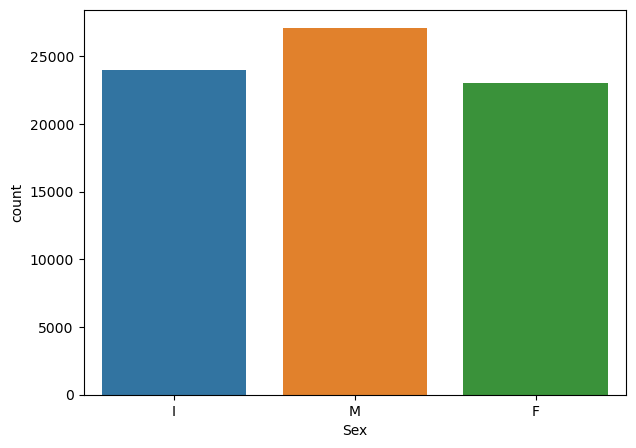

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train,x="Sex")
plt.show()

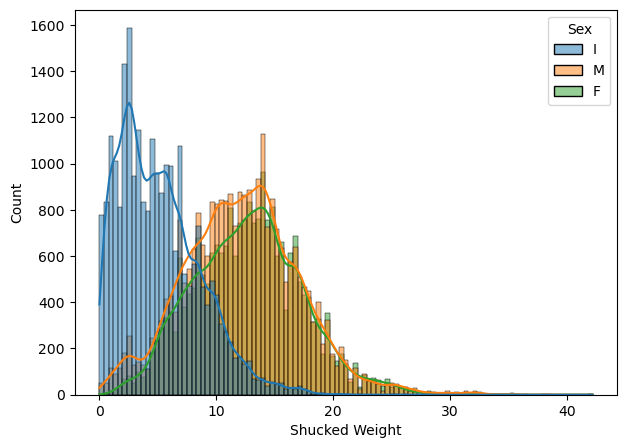

In [14]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Shucked Weight",hue="Sex",kde=True)
plt.show()

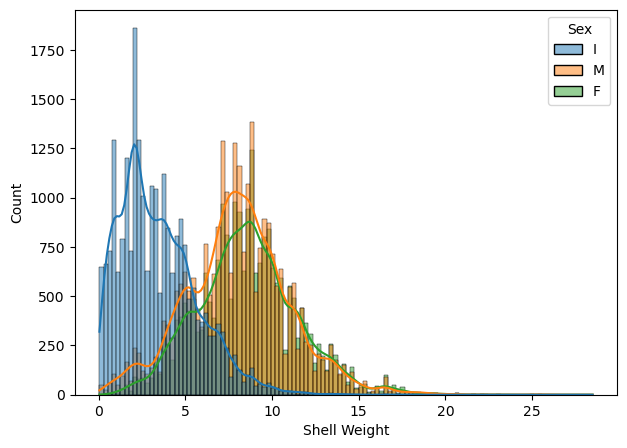

In [15]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Shell Weight",hue="Sex",kde=True)
plt.show()

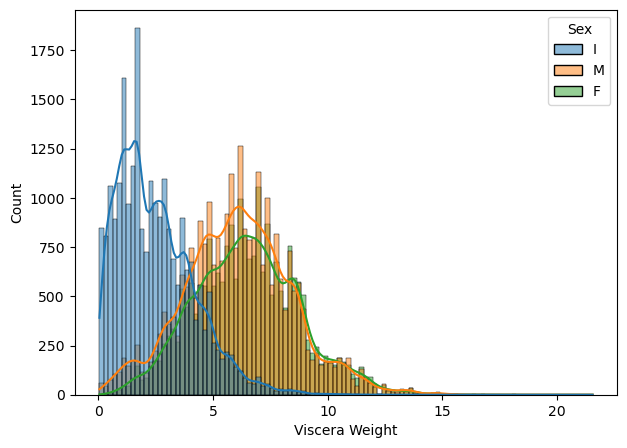

In [16]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Viscera Weight",hue="Sex",kde=True)
plt.show()

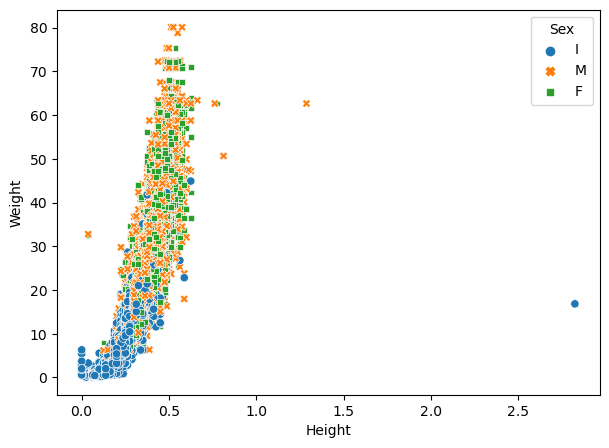

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Height", y="Weight", hue="Sex", style="Sex")
plt.show()

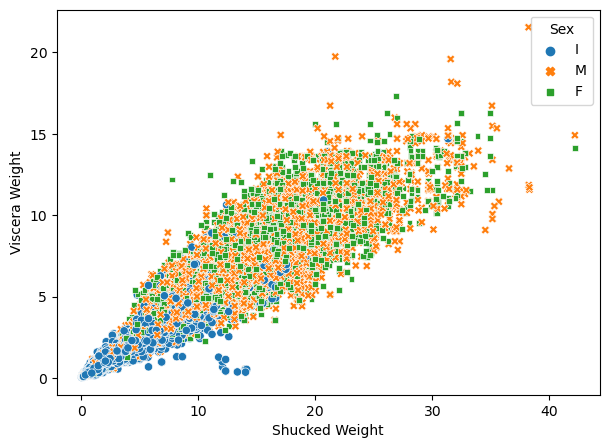

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Shucked Weight", y="Viscera Weight", hue="Sex", style="Sex")
plt.show()

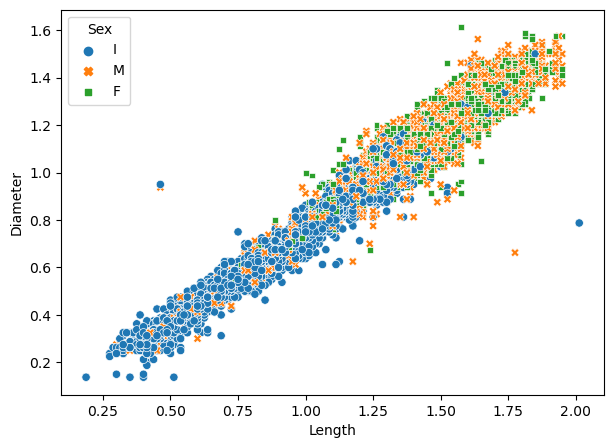

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Length", y="Diameter", hue="Sex", style="Sex")
plt.show()

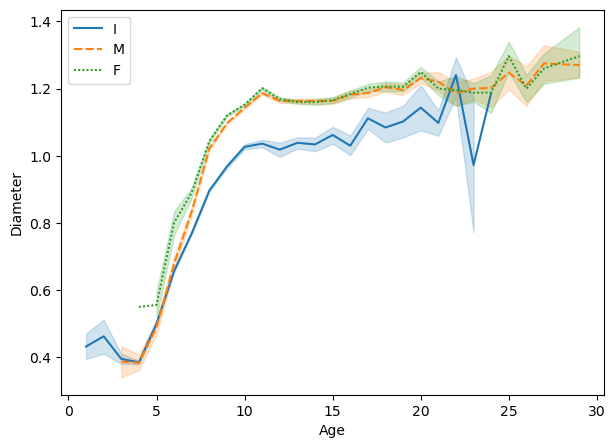

In [20]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_train, x="Age", y="Diameter",hue="Sex",style="Sex")
plt.legend()
plt.show()

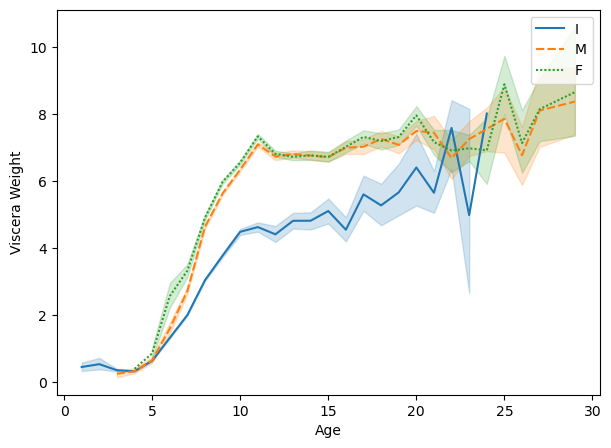

In [21]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_train, x="Age", y="Viscera Weight",hue="Sex",style="Sex")
plt.legend()
plt.show()

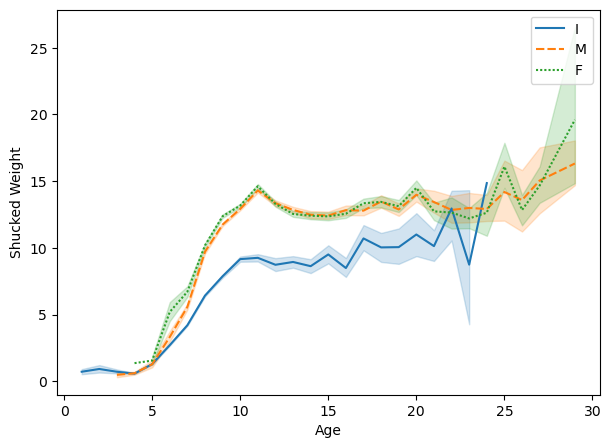

In [22]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_train, x="Age", y="Shucked Weight",hue="Sex",style="Sex")
plt.legend()
plt.show()

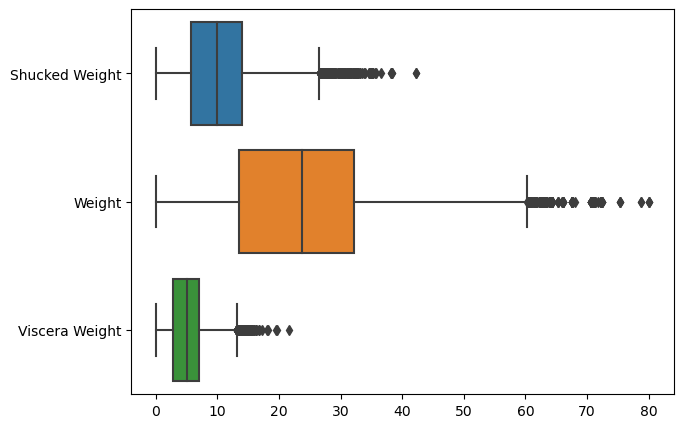

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train[["Shucked Weight", "Weight","Viscera Weight"]], orient="h")
plt.show()

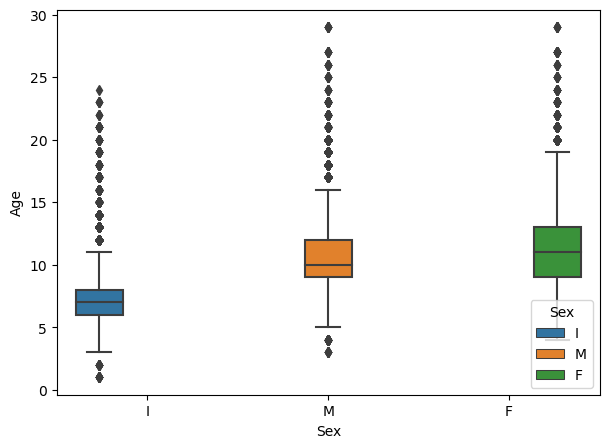

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, y="Age", x="Sex", hue="Sex")
plt.show()

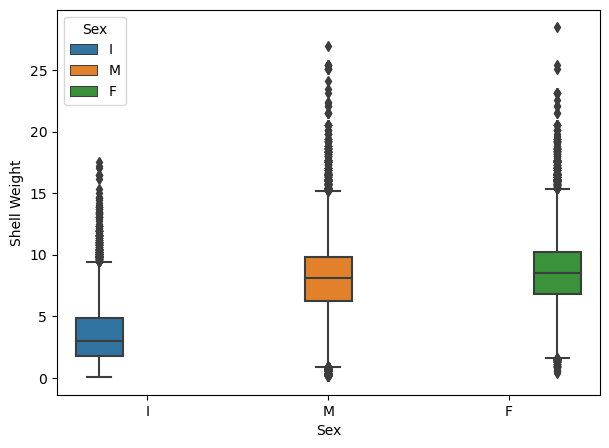

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, y="Shell Weight", x="Sex", hue="Sex")
plt.show()

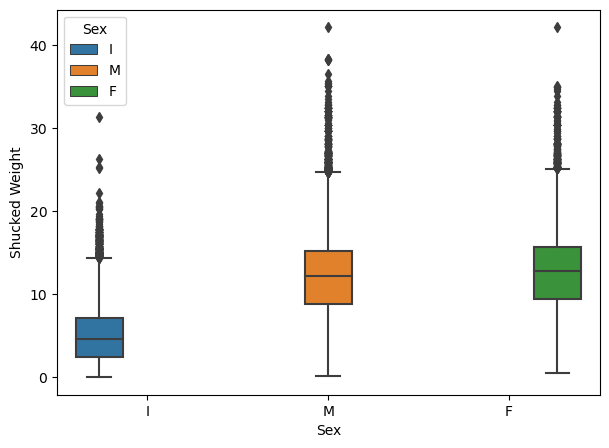

In [26]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, y="Shucked Weight", x="Sex", hue="Sex")
plt.show()

In [27]:
label_encoder = LabelEncoder()
df_train["Sex"]=label_encoder.fit_transform(df_train["Sex"])
df_train.drop("id",axis=1,inplace=True)
df_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


# Before Removing Outliers

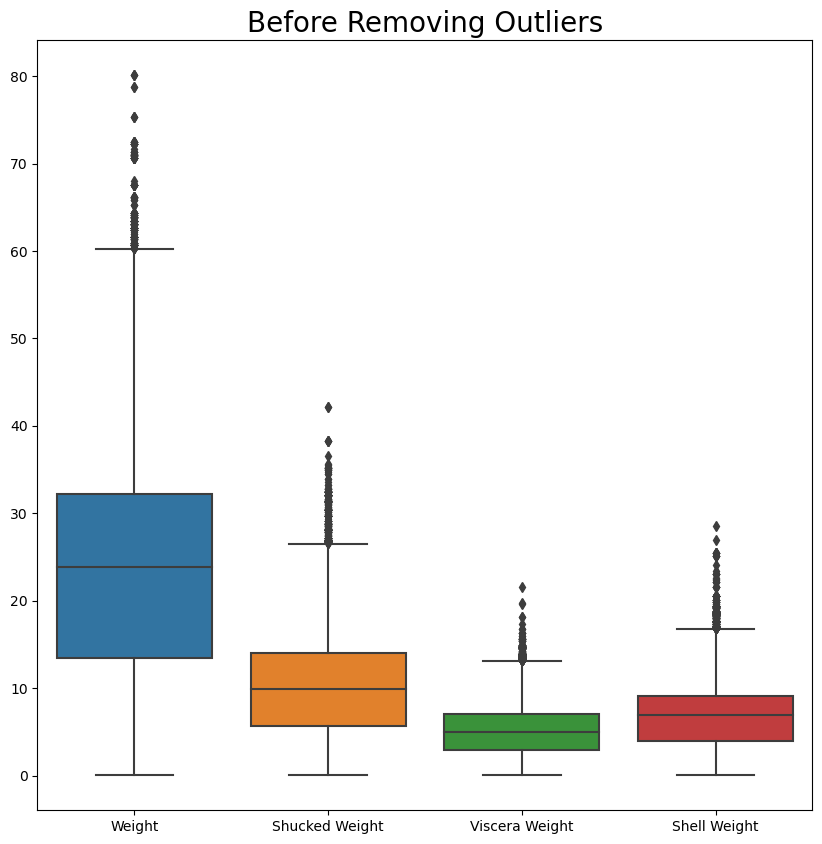

In [28]:
col_scale = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
plt.figure(figsize=(10,10))
sns.boxplot(data=df_train[col_scale])
plt.title("Before Removing Outliers",fontsize=20)
plt.show()

# Apply Z_Score Method

### Weight Column

In [29]:
print("Mean value of Weight",df_train['Weight'].mean())
print("Standard deviation of Weight",df_train['Weight'].std())
print("Minimum value of Weight",df_train['Weight'].min())
print("Maximum value of Weight",df_train['Weight'].max())

Mean value of Weight 23.385216972918357
Standard deviation of Weight 12.648153002843257
Minimum value of Weight 0.056699
Maximum value of Weight 80.10151225


In [30]:
upper_limit=df_train['Weight'].mean() + 3*df_train['Weight'].std()
lower_limit=df_train['Weight'].mean() - 3*df_train['Weight'].std()
print("Upper Limit is :",upper_limit)
print("Lower Limit is :",lower_limit)

Upper Limit is : 61.329675981448126
Lower Limit is : -14.559242035611412


# Find The Outliers

In [31]:
df_train[(df_train['Weight'] >= upper_limit) | (df_train['Weight'] <= lower_limit)]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
141,2,1.8500,1.4375,0.4625,62.397250,30.092994,14.840963,14.982711,13
371,0,1.7750,1.4125,0.5125,64.339190,20.680960,11.538246,17.009700,11
1504,0,1.8000,1.4500,0.5375,62.652395,30.348140,10.857859,14.203100,12
1755,0,1.8375,1.4125,0.5250,64.339190,32.049110,11.495722,18.512224,15
2244,2,1.8125,1.4250,0.4750,72.291225,30.348140,13.692808,20.553387,13
...,...,...,...,...,...,...,...,...,...
72717,2,1.8750,1.5000,0.5000,62.652395,33.920177,13.962129,18.016107,12
72780,2,1.8125,1.4125,0.4750,66.068510,35.521923,15.337079,14.741740,11
72788,2,1.8000,1.3750,0.5125,63.375307,31.340372,14.883487,16.867953,11
73664,2,1.8375,1.4250,0.7625,62.652395,29.809499,11.708343,14.174750,12


# Apply Trimming

In [32]:
trim_df = df_train[(df_train['Weight'] >= lower_limit) & (df_train["Weight"] <= upper_limit)]
df_train["Weight"]=trim_df["Weight"]
print("Before Triming :",len(df_train))
print("After Triming :",len(trim_df))
print("Outliers :",len(df_train)-len(trim_df))

Before Triming : 74051
After Triming : 73852
Outliers : 199


# Shucked Weight Column

In [33]:
print("Mean value of Shucked Weight",df_train['Shucked Weight'].mean())
print("Standard deviation of Shucked Weight",df_train['Shucked Weight'].std())
print("Minimum value of Shucked Weight",df_train['Shucked Weight'].min())
print("Maximum value of Shucked Weight",df_train['Shucked Weight'].max())

Mean value of Shucked Weight 10.104269739832008
Standard deviation of Shucked Weight 5.618025350822559
Minimum value of Shucked Weight 0.0283495
Maximum value of Shucked Weight 42.184056


In [34]:
upper_limit=df_train['Shucked Weight'].mean() + 3*df_train['Shucked Weight'].std()
lower_limit=df_train['Shucked Weight'].mean() - 3*df_train['Shucked Weight'].std()
print("Upper Limit is :",upper_limit)
print("Lower Limit is :",lower_limit)

Upper Limit is : 26.95834579229968
Lower Limit is : -6.749806312635668


# Find The Outliers

In [35]:
df_train.loc[(df_train["Shucked Weight"]>=upper_limit) | (df_train["Shucked Weight"]<=lower_limit)]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
53,0,1.6375,1.4625,0.5000,60.965600,27.867559,10.517665,12.048538,11
141,2,1.8500,1.4375,0.4625,NaN,30.092994,14.840963,14.982711,13
245,0,1.7750,1.4250,0.4875,56.146185,29.100762,13.962129,13.607760,12
442,2,1.8500,1.5000,0.5000,59.618998,29.100762,10.460966,15.237856,12
869,2,1.7375,1.4625,0.5000,60.214338,26.988724,11.793392,16.726205,15
...,...,...,...,...,...,...,...,...,...
72780,2,1.8125,1.4125,0.4750,NaN,35.521923,15.337079,14.741740,11
72788,2,1.8000,1.3750,0.5125,NaN,31.340372,14.883487,16.867953,11
73165,0,1.6750,1.3125,0.4500,43.176288,27.371442,9.171063,11.339800,9
73664,2,1.8375,1.4250,0.7625,NaN,29.809499,11.708343,14.174750,12


# Apply Trimming Delete Outliers

In [36]:
trim_df0=df_train.loc[(df_train["Shucked Weight"]<=upper_limit) & (df_train["Shucked Weight"]>=lower_limit)]
df_train["Shucked Weight"]=trim_df0["Shucked Weight"]
print("Before Triming :",len(df_train))
print("After Triming :",len(trim_df0))
print("Outliers :",len(df_train)-len(trim_df0))

Before Triming : 74051
After Triming : 73782
Outliers : 269


# Viscera Weight Column

In [37]:
print("Mean value of Viscera Weight",df_train['Viscera Weight'].mean())
print("Standard deviation of Viscera Weight",df_train['Viscera Weight'].std())
print("Minimum value of Viscera Weight",df_train['Viscera Weight'].min())
print("Maximum value of Viscera Weight",df_train['Viscera Weight'].max())

Mean value of Viscera Weight 5.058385996246506
Standard deviation of Viscera Weight 2.7927287058162005
Minimum value of Viscera Weight 0.04252425
Maximum value of Viscera Weight 21.54562


In [38]:
upper_limit=df_train['Viscera Weight'].mean() + 3*df_train['Viscera Weight'].std()
lower_limit=df_train['Viscera Weight'].mean() - 3*df_train['Viscera Weight'].std()
print("Upper Limit is :",upper_limit)
print("Lower Limit is :",lower_limit)

Upper Limit is : 13.436572113695107
Lower Limit is : -3.3198001212020953


# Find The Outliers For Viscera Weight

In [39]:
df_train.loc[(df_train["Viscera Weight"]>=upper_limit) | (df_train["Viscera Weight"]<=lower_limit)]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
141,2,1.8500,1.4375,0.4625,NaN,NaN,14.840963,14.982711,13
245,0,1.7750,1.4250,0.4875,56.146185,NaN,13.962129,13.607760,12
804,0,1.7500,1.4375,0.4750,49.228907,22.807173,13.551061,14.174750,11
1223,2,1.7500,1.2875,0.4625,50.561333,23.997852,14.840963,12.459605,10
1602,0,1.8750,1.4000,0.5375,54.941331,21.928338,13.678634,16.300963,12
...,...,...,...,...,...,...,...,...,...
72717,2,1.8750,1.5000,0.5000,NaN,NaN,13.962129,18.016107,12
72780,2,1.8125,1.4125,0.4750,NaN,NaN,15.337079,14.741740,11
72788,2,1.8000,1.3750,0.5125,NaN,NaN,14.883487,16.867953,11
73390,2,1.8125,1.3250,0.5500,58.754339,22.651250,13.621935,16.612807,15


In [40]:
trim_df1=df_train.loc[(df_train["Viscera Weight"]<=upper_limit) & (df_train["Viscera Weight"]>=lower_limit)]
df_train["Viscera Weight"]=trim_df1["Viscera Weight"]
print("Before Triming :",len(df_train))
print("After Triming :",len(trim_df1))
print("Outliers :",len(df_train)-len(trim_df1))

Before Triming : 74051
After Triming : 73850
Outliers : 201


# Shell Weight Column

In [41]:
print("Mean value of Shell Weight",df_train['Shell Weight'].mean())
print("Standard deviation of Shell Weight",df_train['Shell Weight'].std())
print("Minimum value of Viscera Shell Weight",df_train['Shell Weight'].min())
print("Maximum value of Viscera Shell Weight",df_train['Shell Weight'].max())

Mean value of Shell Weight 6.723870114695852
Standard deviation of Shell Weight 3.5843721003973585
Minimum value of Viscera Shell Weight 0.04252425
Maximum value of Viscera Shell Weight 28.4912475


In [42]:
upper_limit=df_train['Shell Weight'].mean() + 3*df_train['Shell Weight'].std()
lower_limit=df_train['Shell Weight'].mean() - 3*df_train['Shell Weight'].std()
print("Upper Limit is :",upper_limit)
print("Lower Limit is :",lower_limit)

Upper Limit is : 17.47698641588793
Lower Limit is : -4.029246186496224


# Find Outlirs For Shell Weight Column

In [43]:
df_train.loc[(df_train["Shell Weight"]>=upper_limit) | (df_train["Shell Weight"]<=lower_limit)]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
100,0,1.8000,1.4125,0.4750,55.961913,18.639796,12.686401,23.104843,14
1000,0,1.7000,1.4250,0.5125,52.219779,17.718438,11.566596,18.427175,19
1006,2,1.7500,1.4375,0.5375,49.342305,17.732612,10.163296,17.718438,16
1251,2,1.8375,1.2625,0.5125,55.352399,20.978630,13.295915,23.430862,14
1755,0,1.8375,1.4125,0.5250,NaN,NaN,11.495722,18.512224,15
...,...,...,...,...,...,...,...,...,...
72853,2,1.6375,1.2875,0.4625,48.931237,15.039410,9.100190,18.427175,21
73065,0,1.7750,1.4000,0.4875,60.072590,23.317464,11.864266,22.112610,13
73316,2,1.7625,1.4125,0.5375,58.768513,21.729892,10.602713,18.852418,11
73719,0,1.7500,1.3625,0.5750,49.668324,21.729892,8.207180,23.104843,11


In [44]:
trim_df2=df_train.loc[(df_train["Shell Weight"]<=upper_limit) & (df_train["Shell Weight"]>=lower_limit)]
df_train["Shell Weight"]=trim_df2["Shell Weight"]
print("Before Triming :",len(df_train))
print("After Triming :",len(trim_df2))
print("Outliers :",len(df_train)-len(trim_df2))

Before Triming : 74051
After Triming : 73779
Outliers : 272


# After Removing Outliers

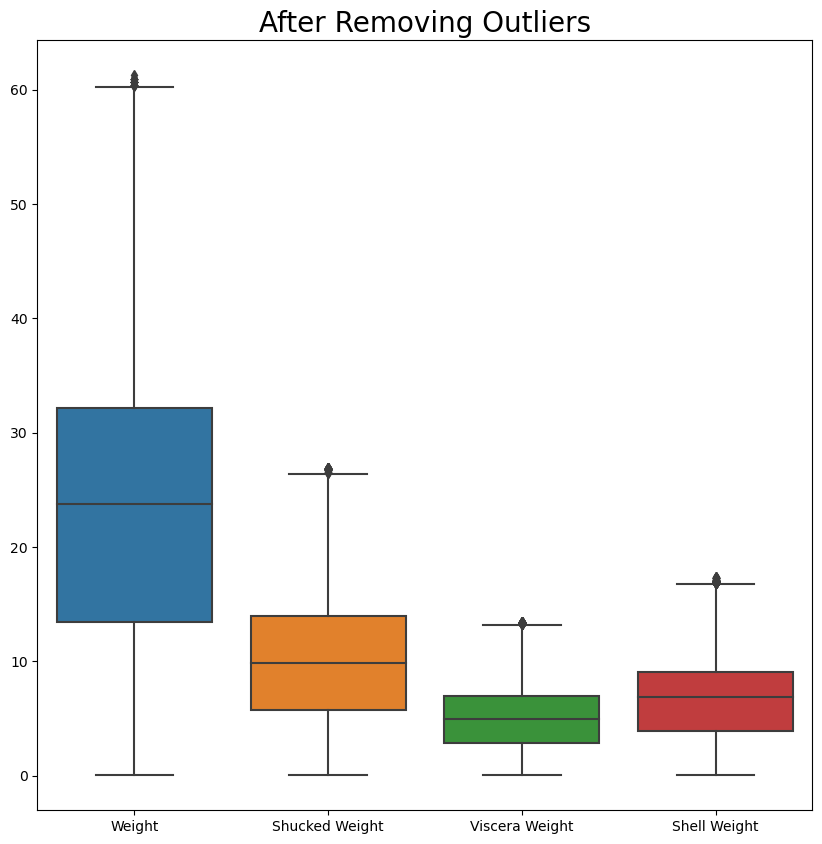

In [45]:
col_scale = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
plt.figure(figsize=(10,10))
sns.boxplot(data=df_train[col_scale])
plt.title("After Removing Outliers",fontsize=20)
plt.show()

# Fill Null Values

In [46]:
mean_value0 = df_train['Weight'].mean()
df_train["Weight"].fillna(mean_value0, inplace=True)
mean_value1 = df_train['Shucked Weight'].mean()
df_train["Shucked Weight"].fillna(mean_value1, inplace=True)

In [47]:
mean_value2 = df_train['Viscera Weight'].mean()
df_train["Viscera Weight"].fillna(mean_value2, inplace=True)
mean_value3 = df_train['Shell Weight'].mean()
df_train["Shell Weight"].fillna(mean_value3, inplace=True)

In [48]:
df_train.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [49]:
df_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


# Train aNd Label Data

In [50]:
col_scale = ["Sex",'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
train_data=df_train[col_scale]

In [51]:
label_data=df_train["Age"]

# Split Data

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.2,random_state=42)

# LinearRegression Model

In [53]:
ln_model=LinearRegression()
ln_model.fit(X_train,Y_train)


LinearRegression()

# MSE,MAE,R2_SCORE_LinearRegressionModel

In [54]:
ln_pred=ln_model.predict(X_test)
mse = mean_squared_error(Y_test,ln_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(Y_test,ln_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test,ln_pred)
print("R2 Score:", r2)

Mean Squared Error: 4.876539931664907
Mean Absolute Error: 1.5328734406377826
R2 Score: 0.5215122468327161


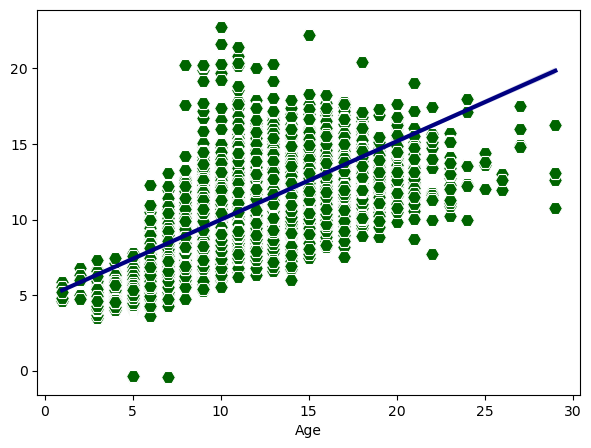

In [55]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=ln_pred,color="navy",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=ln_pred,color="darkgreen",marker="H",s=100)

plt.show()

# RandomForestRegressor Model

In [56]:
random_regr= RandomForestRegressor(random_state=0)
random_regr.fit(X_train,Y_train)


RandomForestRegressor(random_state=0)

# MSE,MAE,R2 Score_RandomForestRegressor

In [57]:
rfr_pred=random_regr.predict(X_test)
mse1 = mean_squared_error(Y_test,rfr_pred)
print("Mean Squared Error:", mse1)
mae1= mean_absolute_error(Y_test,rfr_pred)
print("Mean Absolute Error:", mae1)
r21 = r2_score(Y_test,rfr_pred)
print("R2 Score:", r21)

Mean Squared Error: 4.400939504422389
Mean Absolute Error: 1.4651164674903787
R2 Score: 0.5681783221700667


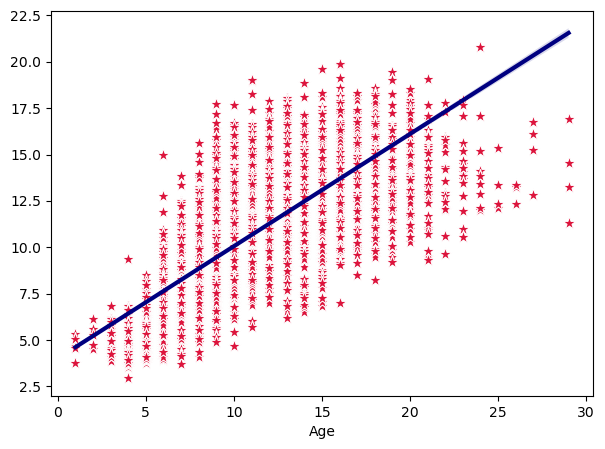

In [58]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=rfr_pred,color="navy",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=rfr_pred,color="crimson",marker="*",s=100)

plt.show()

# GradientBoostingRegressor Model

In [59]:
gb= GradientBoostingRegressor(random_state=0)
gb.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=0)

# MSE,MAE,R2 SCORE_GradientBoostingRegressor

In [60]:
gb_pred=gb.predict(X_test)
mse2 = mean_squared_error(Y_test,gb_pred)
print("Mean Squared Error:", mse2)
mae2= mean_absolute_error(Y_test,gb_pred)
print("Mean Absolute Error:", mae2)
r22 = r2_score(Y_test,gb_pred)
print("R2 Score:", r22)

Mean Squared Error: 4.260649183904103
Mean Absolute Error: 1.4305816496016475
R2 Score: 0.5819436560331269


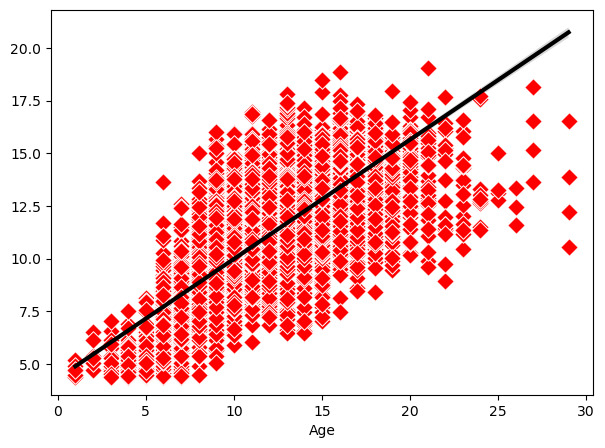

In [61]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=gb_pred,color="black",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=gb_pred,color="red",marker="D",s=80)

plt.show()

# XGBRegressor Model

In [62]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# MSE,MAE,R2_XGBRegressor Model

In [63]:
xgb_pred=xgb.predict(X_test)
mse3 = mean_squared_error(Y_test,xgb_pred)
print("Mean Squared Error:", mse3)
mae3= mean_absolute_error(Y_test,xgb_pred)
print("Mean Absolute Error:", mae3)
r23 = r2_score(Y_test,xgb_pred)
print("R2 Score:", r23)

Mean Squared Error: 4.216113312333107
Mean Absolute Error: 1.4151477800681809
R2 Score: 0.5863135308669165


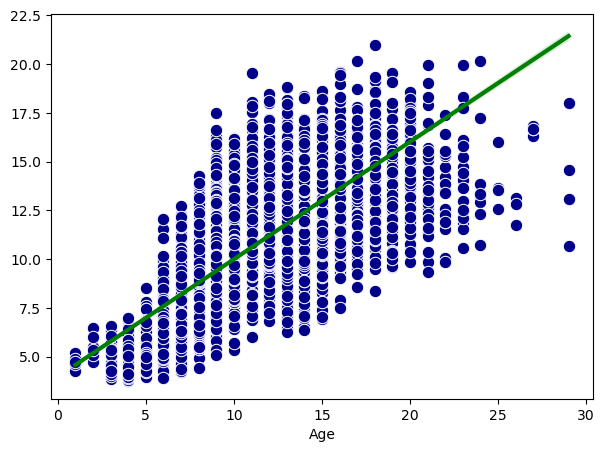

In [64]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=xgb_pred,color="green",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=xgb_pred,color="darkblue",marker="o",s=80)

plt.show()

# Ridge Model

In [65]:
rd=Ridge(alpha=1.0)
rd.fit(X_train,Y_train)

Ridge()

In [66]:
rd_pred=rd.predict(X_test)
mse4 = mean_squared_error(Y_test,rd_pred)
print("Mean Squared Error:", mse4)
mae4= mean_absolute_error(Y_test,rd_pred)
print("Mean Absolute Error:", mae4)
r24 = r2_score(Y_test,rd_pred)
print("R2 Score:", r24)

Mean Squared Error: 4.877086280124611
Mean Absolute Error: 1.532881636744371
R2 Score: 0.5214586389364222


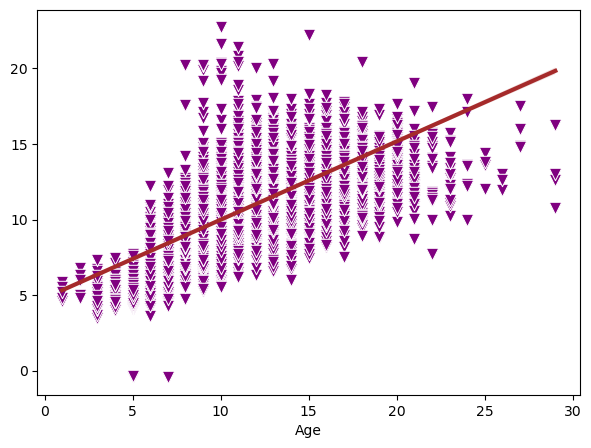

In [67]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=rd_pred,color="brown",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=rd_pred,color="purple",marker="v",s=80)

plt.show()

# Create LGB Model

In [68]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse','mae'],
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [69]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
callbacks = [lgb.early_stopping(40),lgb.log_evaluation()]
lgb_model = lgb.train(params,train_set=lgb_train,valid_sets=[lgb_train, lgb_eval],callbacks=callbacks)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[1]	training's rmse: 3.08684	training's l1: 2.25576	valid_1's rmse: 3.10717	valid_1's l1: 2.27818
Training until validation scores don't improve for 40 rounds
[2]	training's rmse: 3.00932	training's l1: 2.2005	valid_1's rmse: 3.02814	valid_1's l1: 2.22112
[3]	training's rmse: 2.93682	training's l1: 2.14714	valid_1's rmse: 2.95452	valid_1's l1: 2.16628
[4]	training's rmse: 2.87011	training's l1: 2.09752	valid_1's rmse: 2.88663	valid_1's l1: 2.11527
[5]	training's rmse: 2.80743	training's l1: 2.04941	valid_1's rmse: 2.82284	valid_1's l1: 2.06607
[6]	training's rmse: 2.74927	training's l1: 2.00411	valid_1's rmse: 2.76413	valid_1's l1: 2.02002
[7]	training's rmse: 2.6992

In [70]:
lgb_pred=lgb_model.predict(X_test)
mse5 = mean_squared_error(Y_test,lgb_pred)
print("Mean Squared Error:", mse5)
mae5= mean_absolute_error(Y_test,lgb_pred)
print("Mean Absolute Error:", mae5)
r25 = r2_score(Y_test,lgb_pred)
print("R2 Score:", r25)

Mean Squared Error: 4.176036713579648
Mean Absolute Error: 1.4115531593647908
R2 Score: 0.5902458603383954


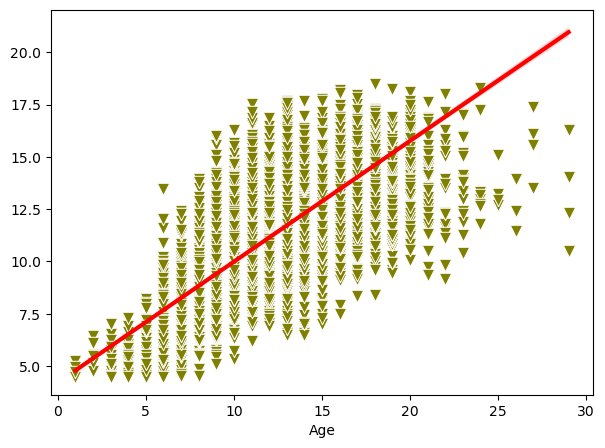

In [71]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=lgb_pred,color="red",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=lgb_pred,color="olive",marker="v",s=80)

plt.show()

# Create CatBoost Model

In [72]:
cat_model = CatBoostRegressor(iterations=1000,loss_function='RMSE',learning_rate=0.1,depth=6,
                              random_seed=42,l2_leaf_reg=3)

cat_model.fit( X_train, Y_train,eval_set=(X_test, Y_test), early_stopping_rounds=100,verbose=100)

0:	learn: 3.0344511	test: 3.0541869	best: 3.0541869 (0)	total: 57.1ms	remaining: 57s
100:	learn: 2.0470476	test: 2.0593941	best: 2.0593941 (100)	total: 741ms	remaining: 6.6s
200:	learn: 2.0104196	test: 2.0437314	best: 2.0437314 (200)	total: 1.36s	remaining: 5.4s
300:	learn: 1.9806152	test: 2.0376217	best: 2.0376217 (300)	total: 2.08s	remaining: 4.84s
400:	learn: 1.9565543	test: 2.0346735	best: 2.0346735 (400)	total: 2.91s	remaining: 4.34s
500:	learn: 1.9366306	test: 2.0338339	best: 2.0337033 (498)	total: 3.67s	remaining: 3.66s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.033703286
bestIteration = 498

Shrink model to first 499 iterations.


In [73]:
cat_pred=cat_model.predict(X_test)
mse6 = mean_squared_error(Y_test,cat_pred)
print("Mean Squared Error:", mse6)
mae6= mean_absolute_error(Y_test,cat_pred)
print("Mean Absolute Error:", mae6)
r26 = r2_score(Y_test,cat_pred)
print("R2 Score:", r26)

Mean Squared Error: 4.135949057380328
Mean Absolute Error: 1.4066070656771343
R2 Score: 0.594179274770215


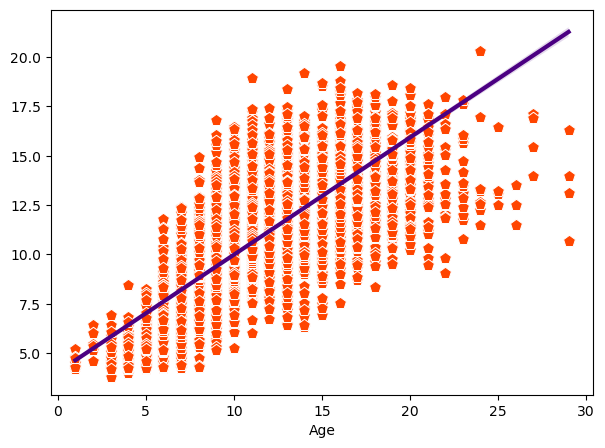

In [74]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=cat_pred,color="indigo",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=cat_pred,color="orangered",marker="p",s=80)

plt.show()

# All Model Result Comparison

In [75]:
all_mse_score = [mse, mse1, mse2, mse3, mse4, mse5, mse6]
all_mae_score = [mae, mae1, mae2, mae4, mae4, mae5, mae6]
all_r2_score = [r2, r21, r22, r23, r24, r25, r26]
all_model = ['ln_model', 'random_regr', 'gb', 'xgb', 'rd', 'lgb_model', 'cat_model']

data = {'Model': all_model,'MSE': all_mse_score,'MAE': all_mae_score,'R2_Score': all_r2_score}
df = pd.DataFrame(data)

df

,Model,MSE,MAE,R2_Score
0,ln_model,4.876540,1.532873,0.521512
1,random_regr,4.400940,1.465116,0.568178
2,gb,4.260649,1.430582,0.581944
3,xgb,4.216113,1.532882,0.586314
4,rd,4.877086,1.532882,0.521459
5,lgb_model,4.176037,1.411553,0.590246
6,cat_model,4.135949,1.406607,0.594179


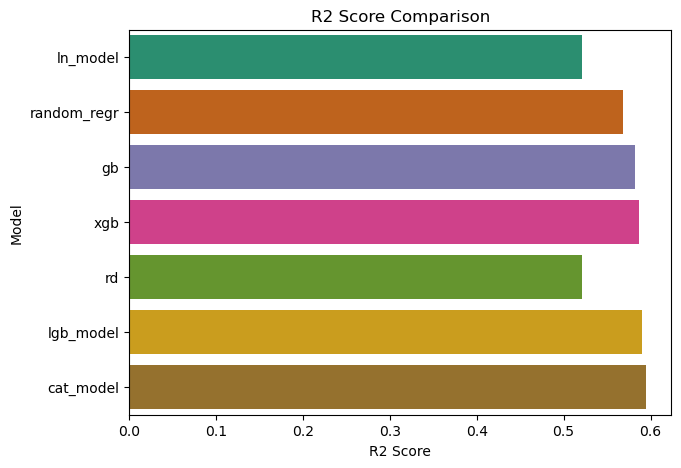

In [76]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="R2_Score", data=df, palette="Dark2")
plt.title('R2 Score Comparison')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

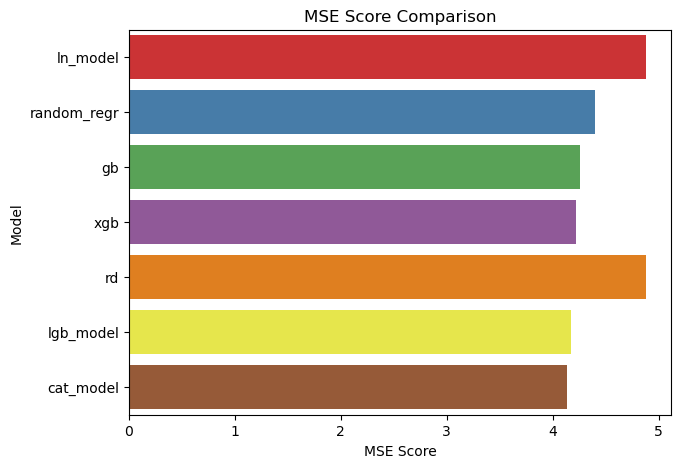

In [77]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="MSE", data=df, palette="Set1")
plt.title('MSE Score Comparison')
plt.xlabel('MSE Score')
plt.ylabel('Model')
plt.show()

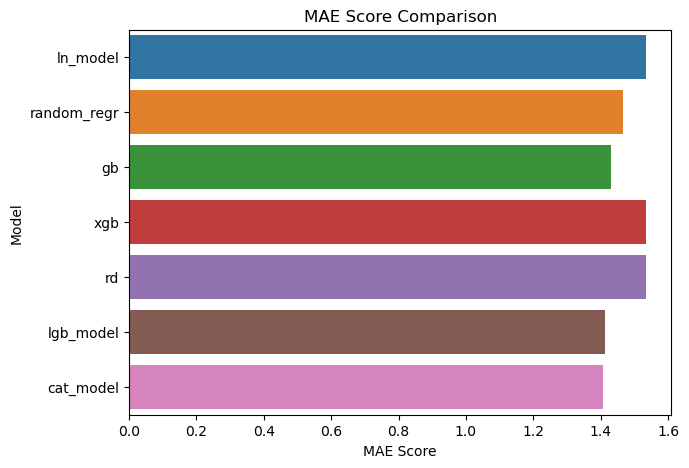

In [78]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="MAE", data=df, palette="tab10")
plt.title('MAE Score Comparison')
plt.xlabel('MAE Score')
plt.ylabel('Model')
plt.show()

# Test Data Analysis

In [79]:
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [80]:
df_test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [81]:
df_test.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [82]:
df_test.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


In [83]:
df_test["Sex"]=label_encoder.fit_transform(df_test["Sex"])
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


# Submit My Result

In [84]:
my_prediction=cat_model.predict(df_test)
my_submission=pd.DataFrame({'id':df_test.id,'Age':my_prediction})
my_submission.to_csv('submission.csv',index=False)

In [85]:
my_submission.head(20)

,id,Age
0,74051,7.693526
1,74052,7.569270
2,74053,10.774119
3,74054,9.826466
4,74055,7.511663
5,74056,12.670937
6,74057,11.757695
7,74058,8.179066
8,74059,12.923923
9,74060,10.532113
